<a href="https://colab.research.google.com/github/dotRelith/even-faster-stable-diffusion/blob/main/even-faster-stable-diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Even Faster Stable Diffusion** by [dotRelith](https://github.com/dotRelith/even-faster-stable-diffusion)
**Step-By-Step Guide:**
*   First-time Installation
  1.   Mount Google Drive
  2.   Install AUTOMATIC1111-web-ui
  3.   MODEL DOWNLOAD/LOAD
  4.   Start AUTOMATIC1111-web-ui

*   Subsequent Installations
  1.   Mount Google Drive
  2.   MODEL DOWNLOAD/LOAD
  3.   Start AUTOMATIC1111-web-ui

Note: If you have enough space in your google drive you can put your own models inside the default folder (/content/gdrive/MyDrive/stable-diffusion-webui/models/Stable-diffusion) that everything will work normally.


**IMPORTANT FOR BEGGINERS**<br>
To execute the code in Colab, follow the arrow in the image and click on the designated area. You will need to repeat this process for each code block that you want to run. If you are unsure of which blocks to run, refer to the **step-by-step guide** for guidance.
<br>
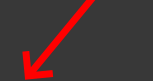

In [ ]:
#@markdown # Mount Google Drive
from IPython.display import clear_output
from IPython.utils import capture
from google.colab import drive
from google.colab import output
from subprocess import getoutput
import os
import time
import fileinput
import sys

drive.mount('/content/gdrive')

print('[1;32mINSTALLING DEPENDENCIES\033[0m')
!pip install -q -U --pre triton
!pip install -q accelerate==0.12.0 transformers ftfy bitsandbytes protobuf==3.19.5 natsort open_clip_torch gradio==3.15.0
!pip install -q https://github.com/brian6091/xformers-wheels/releases/download/0.0.15.dev0%2B4c06c79/xformers-0.0.15.dev0+4c06c79.d20221205-cp38-cp38-linux_x86_64.whl
clear_output()
print('[1;32mDEPENDENCIES INSTALLED!\033[0m')

DEPENDENCIES INSTALLED!


In [ ]:
#@markdown # Check GPU
#@markdown (Just for curiosity)
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

In [ ]:
#@markdown # Install AUTOMATIC1111-web-ui
#markdown > Stable Diffusion github repo was suspended, you'll have to redownload Stable Diffusion fow you to get latest version.<br>I suggest that you delete the old files.

#!git clone https://gitgud.io/AUTOMATIC1111/stable-diffusion-webui.git /content/gdrive/MyDrive/stable-diffusion-webui
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git /content/gdrive/MyDrive/stable-diffusion-webui
!wget --no-check-certificate --content-disposition -P /content/gdrive/MyDrive/stable-diffusion-webui/textual_inversion_templates https://github.com/dotRelith/AUTOMATIC1111-web-ui-extra-files/raw/main/textual_inversion_templates/subject_female.txt
!wget --no-check-certificate --content-disposition -P /content/gdrive/MyDrive/stable-diffusion-webui/textual_inversion_templates https://github.com/dotRelith/AUTOMATIC1111-web-ui-extra-files/raw/main/textual_inversion_templates/subject_female_filewords.txt
!wget --no-check-certificate --content-disposition -P /content/gdrive/MyDrive/stable-diffusion-webui/textual_inversion_templates https://github.com/dotRelith/AUTOMATIC1111-web-ui-extra-files/raw/main/textual_inversion_templates/subject_male.txt
!wget --no-check-certificate --content-disposition -P /content/gdrive/MyDrive/stable-diffusion-webui/textual_inversion_templates https://github.com/dotRelith/AUTOMATIC1111-web-ui-extra-files/raw/main/textual_inversion_templates/subject_male_filewords.txt
!echo "/textual_inversion_templates" >> .gitignore

clear_output()
print('[1;32mDONE!\033[0m')

In [ ]:
#@markdown # Model Download/Load
#@markdown ---
#@markdown > Change this if you want to use another path to store all your models(.ckpt files).<br>( Leave empty to use Colab HardDrive )
CKPT_directory_path = '' #@param {type:"string"}
#@markdown > Path to the CKPT you want to load in by default<br>( Include .ckpt at the end )<br>(Ex: "/content/models/v1-5-pruned.ckpt")
default_CKPT_name = '' #@param {type:"string"}
#@markdown ---
#@markdown > Common Models to download.<br>(Check boxes to download)
AnythingV3 = True #@param {type:"boolean"}
StableDiffusion_v1_5 = False #@param {type:"boolean"}
StableDiffusion_v2_1 = False #@param {type:"boolean"}
WaifuDiffusion_v1_3 = False #@param {type:"boolean"}
WaifuDiffusion_v1_4 = False #@param {type:"boolean"}
OpenJourney_v4 = False #@param {type:"boolean"}
#@markdown > Use last downloaded model as default?
UseLastDownloadedAsDefault = True #@param {type:"boolean"}
#@markdown ---
#@markdown > Direct model link<br>(Leave empty to ignore)
FirstCustomModel = '' #@param {type:"string"}
SecondCustomModel = '' #@param {type:"string"}
ThirdCustomModel = '' #@param {type:"string"}

if CKPT_directory_path == '':
  CKPT_directory_path = '/content/models'
  if not os.path.exists(CKPT_directory_path):
    os.makedirs(CKPT_directory_path)

if default_CKPT_name != '':
  default_CKPT_name = "--ckpt " + default_CKPT_name

%cd "$CKPT_directory_path"

def download_model(model_url, name=None):
  global default_CKPT_name
  file_name = model_url.rsplit('/', 1)[-1]
  if name is not None:
    extension = file_name.rsplit('.', 1)[-1]
    if extension == "pt":
      extension = "vae.pt"
    file_name = f"{name}.{extension}"    
  if UseLastDownloadedAsDefault:
    if file_name.rsplit('.', 1)[-1] == "ckpt" or file_name.rsplit('.', 1)[-1] == "safetensors":
      default_CKPT_name = f"--ckpt {CKPT_directory_path}/{file_name}"
  if not os.path.exists(f"{CKPT_directory_path}/{file_name}"):
    !wget "$model_url" -O "$file_name"

if AnythingV3:
  download_model("https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/Anything-V3.0.vae.pt","Anything-V3.0")
  download_model("https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/Anything-V3.0-pruned.ckpt","Anything-V3.0")
if StableDiffusion_v1_5:
  download_model("https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt","stable_diffusion_v1_5")
if StableDiffusion_v2_1:
  download_model("https://raw.githubusercontent.com/Stability-AI/stablediffusion/main/configs/stable-diffusion/v2-inference-v.yaml","stable_diffusion_v2_1")
  download_model("https://huggingface.co/stabilityai/stable-diffusion-2-1/resolve/main/v2-1_768-ema-pruned.safetensors","stable_diffusion_v2_1")
if WaifuDiffusion_v1_3:
  download_model("https://huggingface.co/hakurei/waifu-diffusion-v1-3/resolve/main/wd-v1-3-full.ckpt","waifu_diffusion_v1_3")
if WaifuDiffusion_v1_4:
  download_model("https://huggingface.co/hakurei/waifu-diffusion-v1-4/raw/main/wd-1-4-anime_e1.yaml","waifu_diffusion_v1_4")
  download_model("https://huggingface.co/hakurei/waifu-diffusion-v1-4/resolve/main/wd-1-4-anime_e1.ckpt","waifu_diffusion_v1_4")
if OpenJourney_v4:
  download_model("https://huggingface.co/prompthero/openjourney/resolve/main/mdjrny-v4.ckpt")
if FirstCustomModel:
  download_model(FirstCustomModel)
if SecondCustomModel:
  download_model(SecondCustomModel)
if ThirdCustomModel:
  download_model(ThirdCustomModel)

clear_output()
print('[1;32mALL MODELS DOWNLOADED!\033[0m')

ALL MODELS DOWNLOADED!


In [ ]:
#@markdown #Start AUTOMATIC1111-web-ui
#@markdown --- 
#@markdown <br>
#@markdown <center> You will hear a <b>quack</b> when the notebook is about to start</center>

#@markdown > ALL CREDITS TO '[TheLastBen](https://github.com/TheLastBen)' for the 'Use_LocalTunnel' code
Use_LocalTunnel = True #@param {type:"boolean"}

with capture.capture_output() as cap:
  if not os.path.exists('/tools/node/bin/lt'):
    !npm install -g localtunnel

with capture.capture_output() as cap:
  %cd /content/gdrive/MyDrive/stable-diffusion-webui/
  !git reset --hard
  !git pull
  time.sleep(5)
  clear_output()
  print('[1;32mUPDATE !')
  !sed -i 's@ui.create_ui().*@ui.create_ui();shared.demo.queue(concurrency_count=999999,status_update_rate=0.1)@' /content/gdrive/MyDrive/stable-diffusion-webui/webui.py
  !sed -i "s@os.path.splitext(checkpoint_file)@os.path.splitext(checkpoint_file); map_location='cuda' if os.path.getsize(checkpoint_file) > 5500000000 else map_location@" /content/gdrive/MyDrive/stable-diffusion-webui/modules/sd_models.py
  !sed -i "s@map_location='cpu'@map_location='cuda'@" /content/gdrive/MyDrive/stable-diffusion-webui/modules/extras.py
  !sed -i 's@min-height: 4.*@min-height: 5.5em;@g' /content/gdrive/MyDrive/stable-diffusion-webui/style.css
  !sed -i 's@"multiple_tqdm": true,@\"multiple_tqdm": false,@' /content/gdrive/MyDrive/stable-diffusion-webui/config.json
  !sed -i '902s@.*@        self.logvar = self.logvar.to(self.device)@' /content/gdrive/MyDrive/stable-diffusion-webui/ldm/models/diffusion/ddpm.py

share=''
if not Use_LocalTunnel:
  share='--share'
  for line in fileinput.input('/usr/local/lib/python3.8/dist-packages/gradio/blocks.py', inplace=True):
    if line.strip().startswith('self.server_name ='):
        line = '            self.server_name = server_name\n'
    if line.strip().startswith('self.server_port ='):
        line = '            self.server_port = server_port\n'
    sys.stdout.write(line)
  clear_output()
else:
  with capture.capture_output() as cap:
    share=''
    %cd /content
    !nohup lt --port 7860 > srv.txt 2>&1 &
    time.sleep(2)
    !grep -o 'https[^ ]*' /content/srv.txt >srvr.txt
    time.sleep(2)
    srv= getoutput('cat /content/srvr.txt')

    for line in fileinput.input('/usr/local/lib/python3.8/dist-packages/gradio/blocks.py', inplace=True):
      if line.strip().startswith('self.server_name ='):
          line = f'            self.server_name = "{srv[8:]}"\n'
      if line.strip().startswith('self.server_port ='):
          line = '            self.server_port = 443\n'
      if line.strip().startswith('self.protocol = "https"'):
          line = '            self.protocol = "https"\n'
      if line.strip().startswith('if self.local_url.startswith("https") or self.is_colab'):
          line = ''
      if line.strip().startswith('else "http"'):
          line = ''
      sys.stdout.write(line)
            
    !sed -i '13s@.*@    "PUBLIC_SHARE_TRUE": "[32mConnected\\033[0m",@' /usr/local/lib/python3.8/dist-packages/gradio/strings.py

    !rm /content/srv.txt
    !rm /content/srvr.txt

if os.path.exists('/content/gdrive/MyDrive/stable-diffusion-webui/extensions/sd_dreambooth_extension'):
  !pip install /content/gdrive/MyDrive/stable-diffusion-webui/extensions/sd_dreambooth_extension/requirements.txt

clear_output()
print('[1;32mSERVER CONFIG DEPLOYED!\033[0m')

%cd /content/gdrive/MyDrive/stable-diffusion-webui/
output.eval_js('new Audio("https://cdn.pixabay.com/download/audio/2022/03/10/audio_5adfa08633.mp3?filename=075176_duck-quack-40345.mp3").play()')
performance_args = "--opt-split-attention"
!python launch.py --enable-insecure-extension-access --xformers --ckpt-dir "$CKPT_directory_path" $default_CKPT_name --deepdanbooru --precision full --no-half $share

SERVER CONFIG DEPLOYED!
/content/gdrive/MyDrive/stable-diffusion-webui
Python 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
Commit hash: ff6a5bcec1ce25aa8f08b157ea957d764be23d8d
Installing requirements for Web UI

#######################################################################################################
Initializing Dreambooth
If submitting an issue on github, please provide the below text for debugging purposes:

Python revision: 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
Dreambooth revision: 17c3864803ebb50615205271de687be96cfc96e8
SD-WebUI revision: ff6a5bcec1ce25aa8f08b157ea957d764be23d8d

Checking Dreambooth requirements...
[+] bitsandbytes version 0.35.0 installed.
[+] diffusers version 0.10.2 installed.
[+] transformers version 4.25.1 installed.
[+] xformers version 0.0.15.dev0+4c06c79.d20221205 installed.
[+] torch version 1.13.0+cu116 installed.
[+] torchvision version 0.14.0+cu116 installed.

######################################################